In [1]:
from __future__ import annotations

import pandas as pd

from utils import *

set_seaborn_paper_context()

In [2]:
figs_dir = Path("../figures/main")
sup_figs_dir = Path("../figures/supplementary")
sup_tabs_dir = Path("../tables/supplementary")
tabs_dir = Path("../tables/main")
sup_figs_dir = sup_figs_dir / "clustering"

ensure_dirs(figs_dir, sup_figs_dir, tabs_dir, sup_tabs_dir)

edge_eval_metrics = pd.read_csv(sup_tabs_dir / "edge_eval_metrics.csv")
clustering_metrics = pd.read_csv(sup_tabs_dir / "clustering_metrics.csv")
clustering_stability = pd.read_csv(sup_tabs_dir / "clustering_stability.csv")

model_label_map = {
    "LinearDistScore": "Lin–Score",
    "MechProbLinearDist": "Lin–Mech",
    "LogitProbLinearDist_0.1": "Lin–Logit(0.1)",
    "LogitProbLinearDist_1.0": "Lin–Logit(1.0)",
    "PoissonDistScore": "Pois–Score",
    "MechProbPoissonDist": "Pois–Mech",
    "LogitProbPoissonDist_0.1": "Pois–Logit(0.1)",
    "LogitProbPoissonDist_1.0": "Pois–Logit(1.0)",
}

scenario_label_map = {
    "baseline": "Baseline",

     # Surveillance scenarios
    "surveillance_moderate": "Surveillance (moderate)",
    "surveillance_severe": "Surveillance (severe)",

     # High evolutionary signal scenarios
    "high_clock_signal": "High clock signal",
    "high_k_inc": "High incubation shape",
    "high_scale_inc": "High incubation scale",

    # Low evolutionary signal scenarios
    "low_clock_signal": "Low clock signal",
    "low_k_inc": "Low incubation shape",
    "low_scale_inc": "Low incubation scale",

    "relaxed_clock": "Relaxed clock",
    "adversarial": "Adversarial",
}

In [3]:
edge_eval_metrics["ModelLabel"] = edge_eval_metrics["Model"].map(model_label_map)
edge_eval_metrics["ScenarioLabel"] = edge_eval_metrics["Scenario"].map(scenario_label_map)

clustering_metrics["ModelLabel"] = clustering_metrics["Weight_Column"].map(model_label_map)
clustering_metrics["ScenarioLabel"] = clustering_metrics["Scenario"].map(scenario_label_map)

clustering_stability["ModelLabel"] = clustering_stability["Weight_Column"].map(model_label_map)
clustering_stability["ScenarioLabel"] = clustering_stability["Scenario"].map(scenario_label_map)

### Figure 1

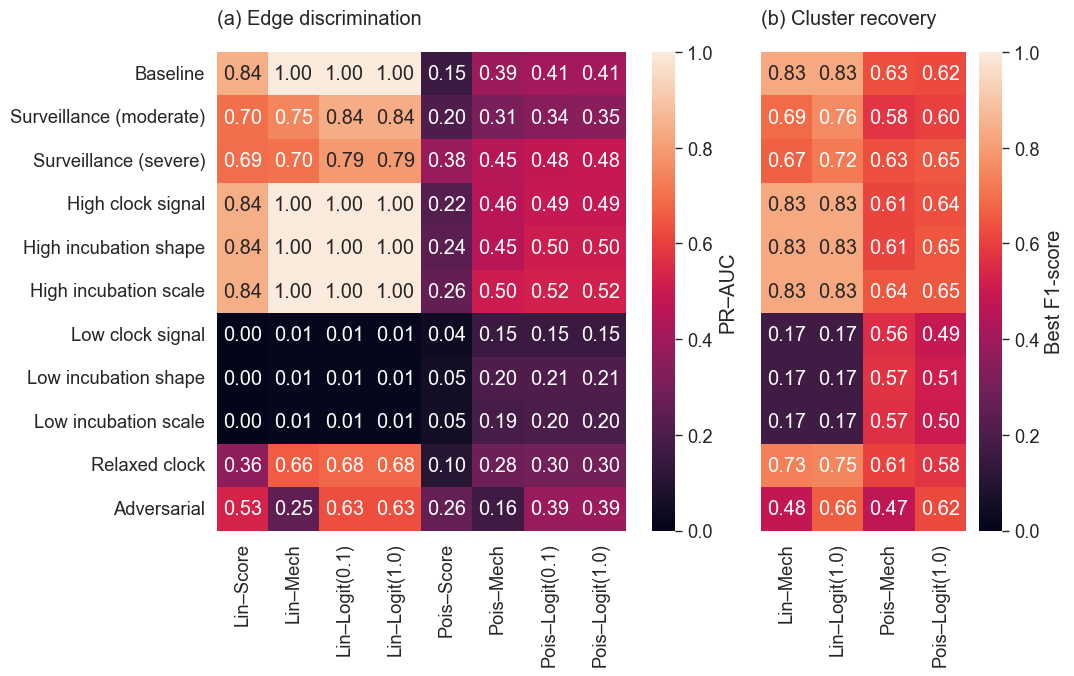

In [4]:
model_order = list(model_label_map.values())
scenario_order = list(scenario_label_map.values())

pr_heat = edge_eval_metrics.pivot(
    index="ScenarioLabel",
    columns="ModelLabel",
    values="PR_AUC",
).reindex(index=scenario_order, columns=model_order)

best_f1 = clustering_metrics.groupby(
    ["ScenarioLabel", "ModelLabel"], as_index=False
)["BCubed_F1_Score"].max()


best_f1_heat = best_f1.pivot(
    index="ScenarioLabel",
    columns="ModelLabel",
    values="BCubed_F1_Score",
).reindex(index=scenario_order)

best_f1_heat = best_f1_heat[[
    "Lin–Mech",
    "Lin–Logit(1.0)",
    "Pois–Mech",
    "Pois–Logit(1.0)",
]]

fig1, axes = plt.subplots(1, 2, figsize=(11, 7), sharey=True, width_ratios=[2, 1])
sns.heatmap(
    pr_heat,
    vmin=0, vmax=1,
    annot=True, fmt=".2f",
    cbar_kws={"label": "PR–AUC"},
    ax=axes[0]
)
axes[0].set_xlabel("")
axes[0].set_ylabel("")
axes[0].set_title("(a) Edge discrimination", pad=20, loc='left')

sns.heatmap(
    best_f1_heat,
    vmin=0, vmax=1,
    annot=True, fmt=".2f",
    cbar_kws={"label": "Best F1-score"},
    ax=axes[1]
)
axes[1].set_xlabel("")
axes[1].set_ylabel("")
axes[1].set_title("(b) Cluster recovery", pad=20, loc='left')
plt.tight_layout()
save_figure(fig1, figs_dir / "figure1", ["png", "pdf"])
plt.show()

## Figure 1: supplementary figures and tables

In [65]:
def plot_cluster_metrics(df, out_path, metric="BCubed_F1_Score", col_wrap=3):
    m_order = ['Lin–Mech', 'Lin–Logit(1.0)', 'Pois–Mech', 'Pois–Logit(1.0)']
    g = sns.relplot(
        data=df,
        x="gamma",
        y=metric,
        hue="ModelLabel",
        hue_order=m_order,
        col="ScenarioLabel",
        col_order=scenario_order,
        col_wrap=col_wrap,
        kind="line",
        marker="o",
        height=2.8,
        aspect=1.15,
    )

    g.set_titles("{col_name}")
    g.set_axis_labels(r"Resolution ($\gamma$)", "-".join(metric.split("_")[1:]))
    g.set(ylim=(0, 1.05))
    g.legend.set_title("Probability and Genome Simulation Model")
    sns.move_legend(
        g,
        loc="upper center",
        bbox_to_anchor=(0.45, 1.08),
        ncol=4,
        frameon=True,
    )
    g.figure.savefig(out_path.with_suffix(".png"), dpi=300, bbox_inches="tight")
    g.figure.savefig(out_path.with_suffix(".pdf"), bbox_inches="tight")

    plt.show()
    plt.close(g.figure)

def plot_stability_metrics(df, out_path, metric="BCubed_F1_Score", col_wrap=3):
    m_order = ['Lin–Mech', 'Lin–Logit(1.0)', 'Pois–Mech', 'Pois–Logit(1.0)']
    g = sns.relplot(
        data=df,
        x="gamma1",
        y=metric,
        hue="ModelLabel",
        hue_order=m_order,
        col="ScenarioLabel",
        col_order=scenario_order,
        col_wrap=col_wrap,
        kind="line",
        marker="o",
        height=2.8,
        aspect=1.15,
    )

    g.set_titles("{col_name}")
    g.set_axis_labels(r"Resolution ($\gamma$)", "-".join(metric.split("_")[1:]))
    g.set(ylim=(0, 1.05))
    g.legend.set_title("Probability and Genome Simulation Model")
    sns.move_legend(
        g,
        loc="upper center",
        bbox_to_anchor=(0.45, 1.08),
        ncol=4,
        frameon=True,
    )

    g.figure.savefig(out_path.with_suffix(".png"), dpi=300, bbox_inches="tight")
    g.figure.savefig(out_path.with_suffix(".pdf"), bbox_inches="tight")
    plt.show()
    plt.close(g.figure)

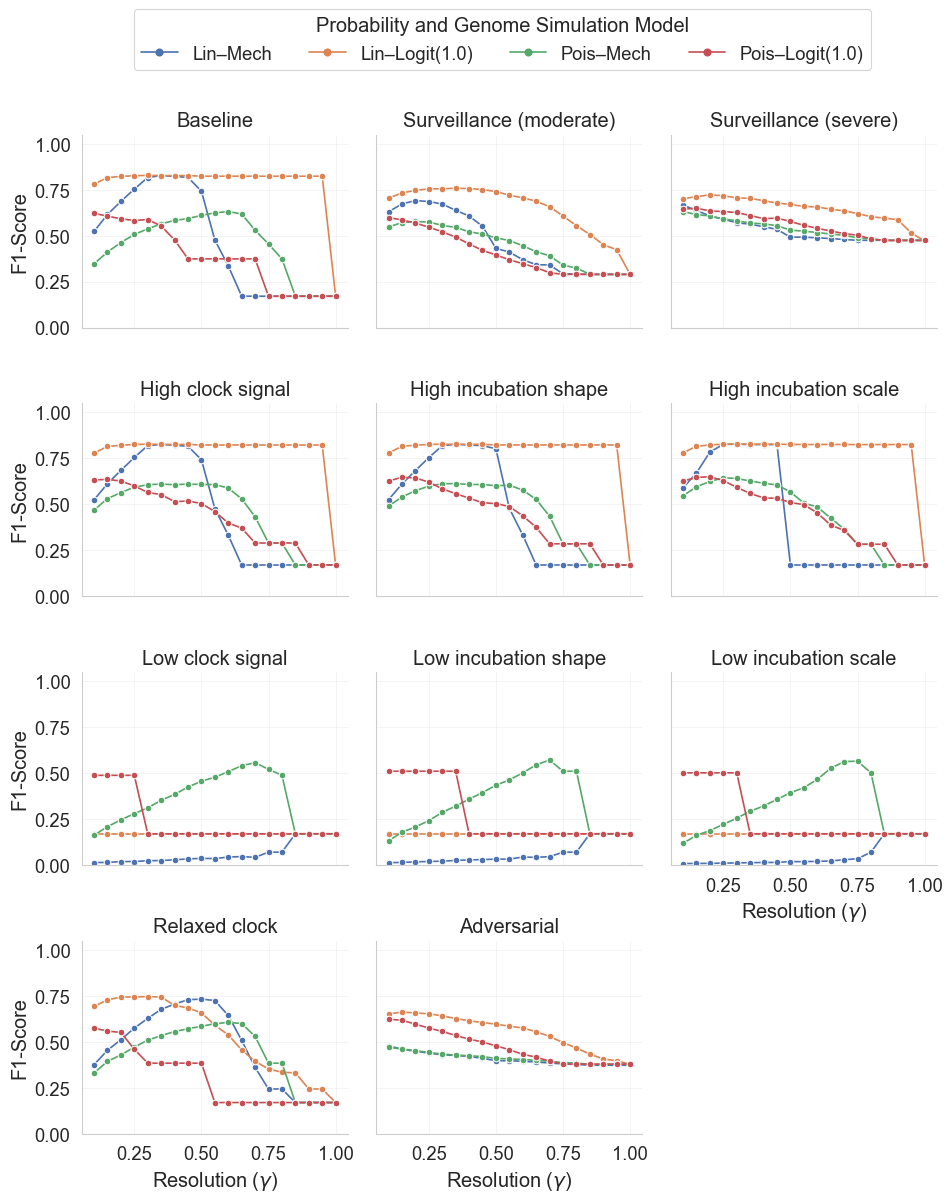

In [66]:
plot_cluster_metrics(
    clustering_metrics,
    sup_figs_dir / "sm6_cluster_metrics_f1",
    metric="BCubed_F1_Score",
    col_wrap=3
)

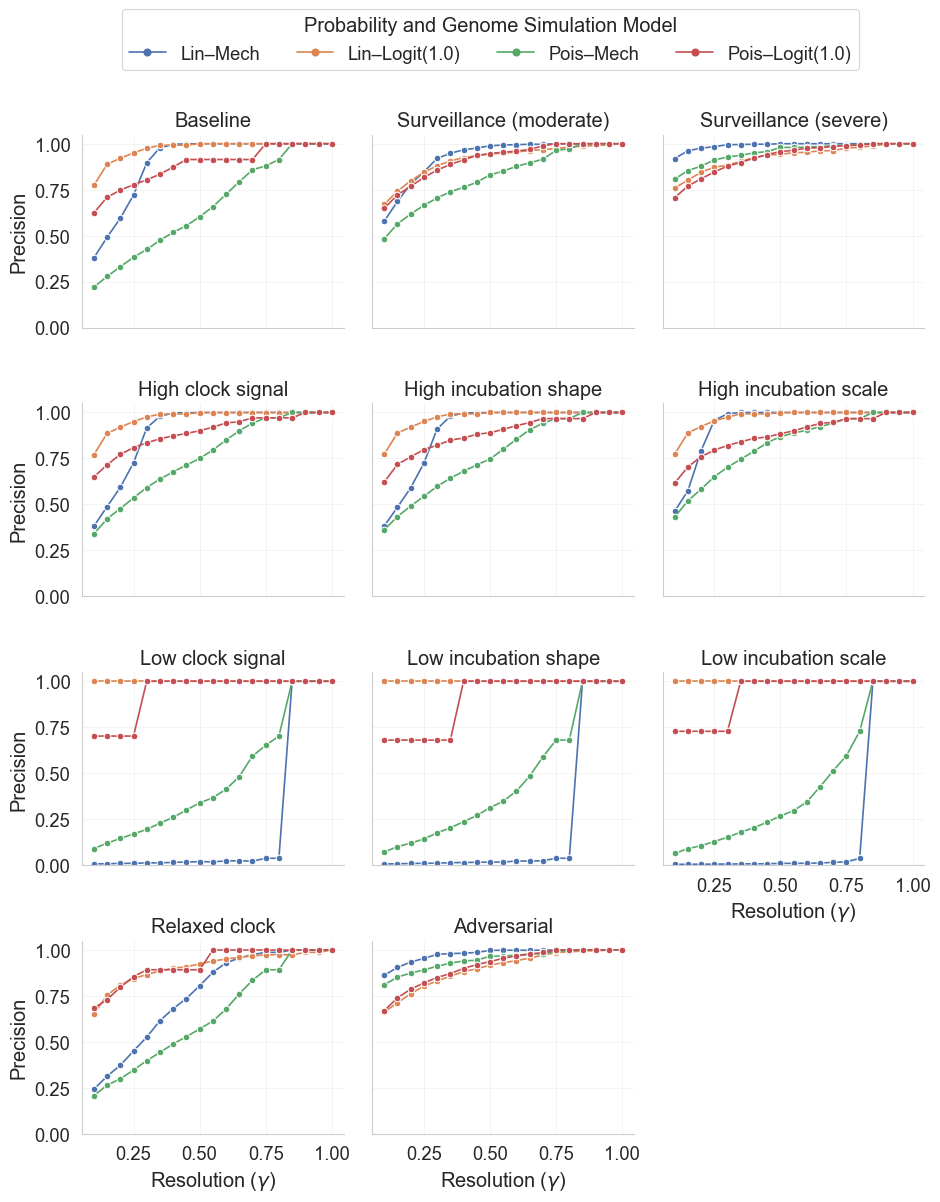

In [61]:
plot_cluster_metrics(
    clustering_metrics,
    sup_figs_dir / "sm6_cluster_metrics_precision",
    metric="BCubed_Precision",
    col_wrap=3
)

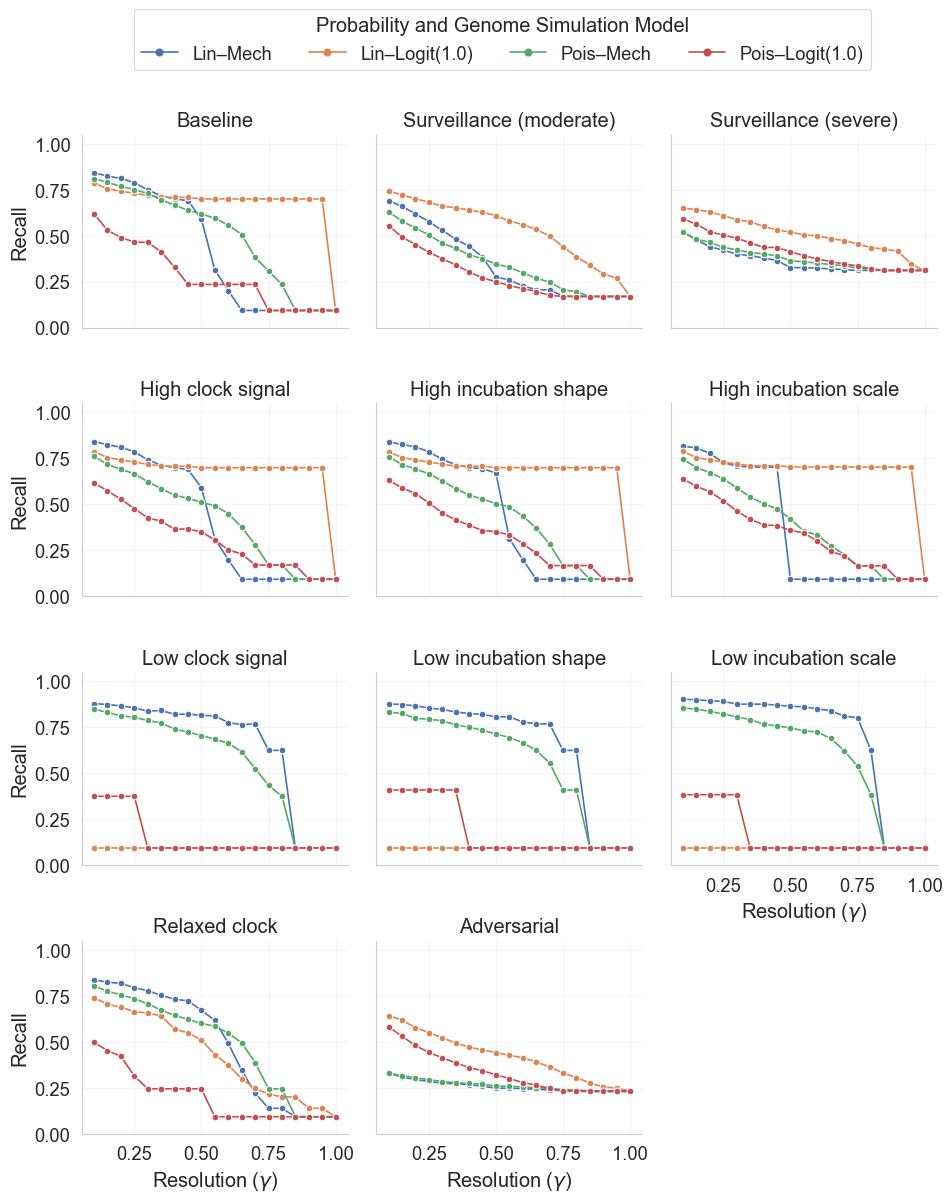

In [62]:
plot_cluster_metrics(
    clustering_metrics,
    sup_figs_dir / "sm6_cluster_metrics_recall",
    metric="BCubed_Recall",
    col_wrap=3
)

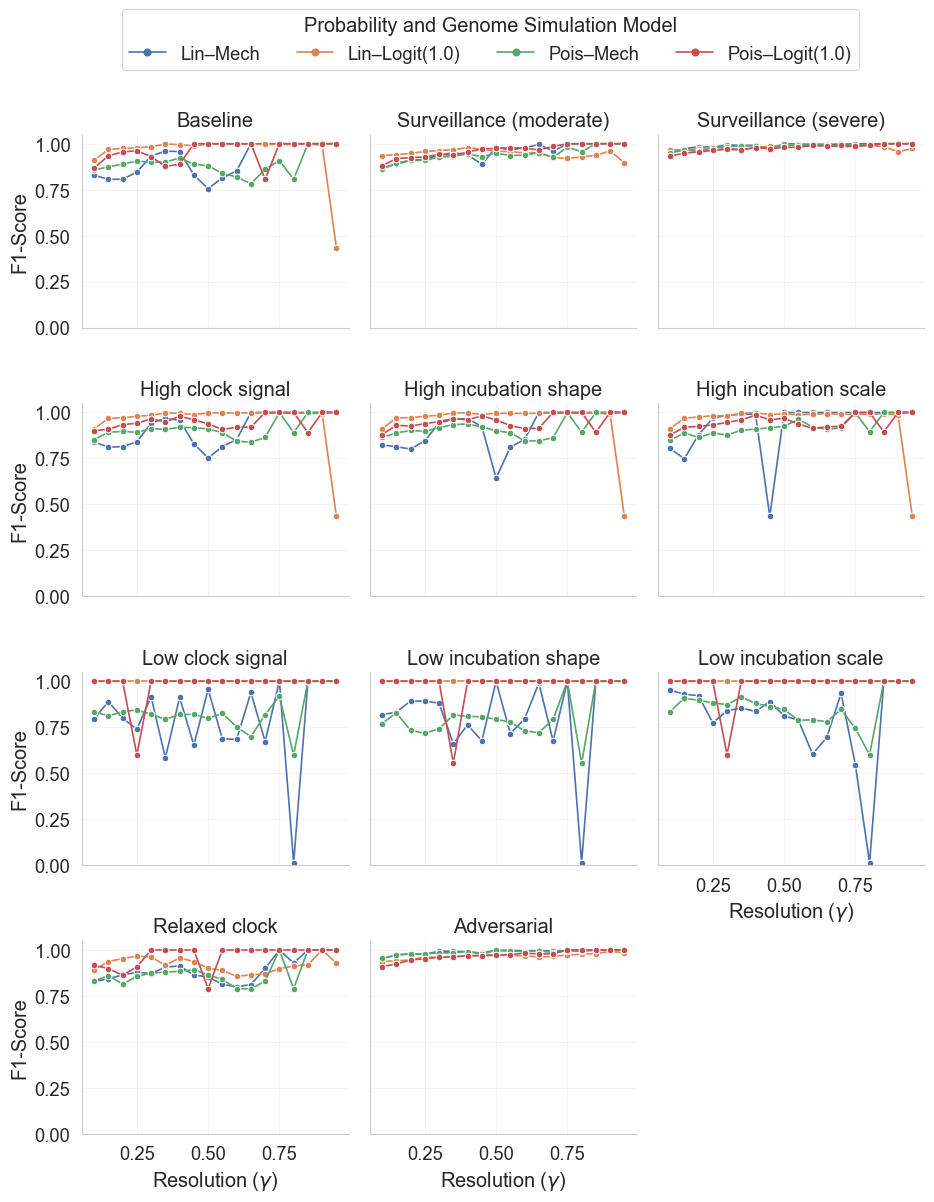

In [67]:
plot_stability_metrics(
    clustering_stability,
    sup_figs_dir / "sm6_clustering_stability_f1",
    metric="BCubed_F1_Score",
    col_wrap=3
)